# Pandas

The `numpy` module is excellent for numerical computations, but to handle missing data or arrays with mixed types takes more work. The `pandas` module is currently the most widely used tool for data manipulation, providing high-performance, easy-to-use data structures and advanced data analysis tools.

In particular `pandas` features:

* A fast and efficient "DataFrame" object for data manipulation with integrated indexing;
* Tools for reading and writing data between in-memory data structures and different formats (CSV, Excel, SQL, HDF5);
* Intelligent data alignment and integrated handling of missing data;
* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets;
* Aggregating or transforming data with a powerful "group-by" engine; 
* High performance merging and joining of data sets;
* Hierarchical axis indexing provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure;
* Time series-functionalities;
* Highly optimized for performance, with critical code paths written in Cython or C.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Series

Series are completely equivalent to 1D array but with axis labels and the possibility to store heterogeneous elements. Of paramount importance are the time-series, used to define time evolutions of a phenomenon. 


In [2]:
from string import ascii_lowercase as letters

# Creating a series, accessing indexes, values and values by their index 
xs = pd.Series(np.arange(10)*0.5, index=tuple(letters[:10]))
print (xs,'\n')
print (xs.index,'\n')
# Values of the Series are actually a numpy array
print (xs.values, type(xs.values),'\n')
print (xs['f'], xs.f, xs.h, '\n')
print (xs[['d', 'f', 'h']], '\n')

a    0.0
b    0.5
c    1.0
d    1.5
e    2.0
f    2.5
g    3.0
h    3.5
i    4.0
j    4.5
dtype: float64 

Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype='object') 

[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5] <class 'numpy.ndarray'> 

2.5 2.5 3.5 

d    1.5
f    2.5
h    3.5
dtype: float64 



In [3]:
# Extracting elements and operations: same as numpy array
print (xs[:3],'\n')
print (xs[7:], '\n')
print (xs[::3], '\n')
print (xs[xs>3], '\n')
print (np.exp(xs), '\n')
print (np.mean(xs), np.std(xs), '\n')

a    0.0
b    0.5
c    1.0
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a    0.0
d    1.5
g    3.0
j    4.5
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a     1.000000
b     1.648721
c     2.718282
d     4.481689
e     7.389056
f    12.182494
g    20.085537
h    33.115452
i    54.598150
j    90.017131
dtype: float64 

2.25 1.4361406616345072 



In [4]:
# Series can be created from python dictionary too.
# Not that the elements can be whatever!
d = {'b' : 1, 'a' : 'cat', 'c' : [2,3]}
pd.Series(d)

b         1
a       cat
c    [2, 3]
dtype: object

A key difference between Series and ndarray is that operations between Series automatically align the data based on label. Thus, you can write computations without giving consideration to whether the Series involved have the same labels.

In [5]:
s = pd.Series(np.random.randn(5), index=tuple(letters[:5]))
print(s)
print(s[1:])
print(s[:-1])
s[1:] + s[:-1]

#fa l'operazione solo se ci sono gli stessi membri da ambo i lati

a   -0.674001
b    0.733500
c   -0.177590
d    1.141911
e   -1.984179
dtype: float64
b    0.733500
c   -0.177590
d    1.141911
e   -1.984179
dtype: float64
a   -0.674001
b    0.733500
c   -0.177590
d    1.141911
dtype: float64


a         NaN
b    1.467001
c   -0.355180
d    2.283822
e         NaN
dtype: float64

### Time series

Time series are very often used to profile the behaviour of a quantity as a function of time. Pandas as a special index for that, `DatetimeIndex`, that can be created e.g. with the function `pd.data_range()`

In [6]:
# to define a date, the datetime module is very useful
import datetime as dt
date = dt.date.today()
date = dt.datetime(2018,11,19,14,45,10,15)
print (date)

# otherwise, several notations are interpreted too
date = 'Nov 19 2018'
date = '19/11/2018 14:45:00'
print (date)

days = pd.date_range(date, periods=7, freq='D') #D=day è il tipo di upgrade
print (days)

seconds = pd.date_range(date, periods=3600, freq='s')
print (seconds)


2018-11-19 14:45:10.000015
19/11/2018 14:45:00
DatetimeIndex(['2018-11-19 14:45:00', '2018-11-20 14:45:00',
               '2018-11-21 14:45:00', '2018-11-22 14:45:00',
               '2018-11-23 14:45:00', '2018-11-24 14:45:00',
               '2018-11-25 14:45:00'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2018-11-19 14:45:00', '2018-11-19 14:45:01',
               '2018-11-19 14:45:02', '2018-11-19 14:45:03',
               '2018-11-19 14:45:04', '2018-11-19 14:45:05',
               '2018-11-19 14:45:06', '2018-11-19 14:45:07',
               '2018-11-19 14:45:08', '2018-11-19 14:45:09',
               ...
               '2018-11-19 15:44:50', '2018-11-19 15:44:51',
               '2018-11-19 15:44:52', '2018-11-19 15:44:53',
               '2018-11-19 15:44:54', '2018-11-19 15:44:55',
               '2018-11-19 15:44:56', '2018-11-19 15:44:57',
               '2018-11-19 15:44:58', '2018-11-19 15:44:59'],
              dtype='datetime64[ns]', length=3600, fr

To learn more about the frequency strings, please see this [link](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)


Timestamped data is the most basic type of time series data that associates values with points in time. For pandas objects it means using the points in time.

functions like `pd.to_datetime` can be used, for instance, when reading information as string from a dataset

In [7]:
tstamp = pd.Timestamp(dt.datetime(2018, 11, 19))

# internally it counts the nanoseconds from January 1st 19
#tstamp = pd.Timestamp(dt.datetime(1970, 1, 1, 0, 0, 0, 1))
print(tstamp.value)

# when creating a timestamp the format can be explicitly passed
print (pd.to_datetime('2010/11/12', format='%Y/%m/%d'))
print (pd.to_datetime('12-11-2010 00:00', format='%d-%m-%Y %H:%M'))


1542585600000000000
2010-11-12 00:00:00
2010-11-12 00:00:00


A standard series can be created and (range of) elements can be used as indexes

In [8]:
tseries = pd.Series(np.random.normal(10, 1, len(days)), index=days)
# Extracting elements
print (tseries[0:4], '\n')
print (tseries['2018-11-19':'2018-11-21'], '\n') # Note - includes end time


2018-11-19 14:45:00     8.467381
2018-11-20 14:45:00     8.409513
2018-11-21 14:45:00    10.728545
2018-11-22 14:45:00    10.293154
Freq: D, dtype: float64 

2018-11-19 14:45:00     8.467381
2018-11-20 14:45:00     8.409513
2018-11-21 14:45:00    10.728545
Freq: D, dtype: float64 



`pd.to_datetime` can also be used to create a `DatetimeIndex`:

In [9]:
pd.to_datetime([1, 2, 3], unit='D', origin=pd.Timestamp('1980-02-03'))

DatetimeIndex(['1980-02-04', '1980-02-05', '1980-02-06'], dtype='datetime64[ns]', freq=None)

## DataFrame

A pandas DataFrame is like a simple tabular spreadsheet. For future reference (or for people already familiar with R), a pandas DataFrame is very similar to the R DataFrame.

Each column in a DataFrame is a Series object.

The element can be whatever, missing data are dealt with too (as NaN)

### DataFrame creation

A DataFrame can be created implicitly, with, e.g., a DatatimeIndex object as index:

In [10]:
entries=10
dates=pd.date_range('19/11/2018 14:45:00',freq='h', periods=entries)
df = pd.DataFrame(np.random.randn(entries,4), index=dates, columns=['A','B','C','D'])
df


,A,B,C,D
2018-11-19 14:45:00,1.039953,-0.981160,-1.111930,-0.321126
2018-11-19 15:45:00,-1.044764,0.498050,0.190662,-1.396085
2018-11-19 16:45:00,1.288412,-1.101660,0.127998,-0.261889
2018-11-19 17:45:00,1.049364,-1.799999,-0.147010,-1.280260
2018-11-19 18:45:00,0.310284,-1.795323,-1.963909,-0.887048
2018-11-19 19:45:00,-0.825073,-0.566352,-0.064669,-0.909291
2018-11-19 20:45:00,-0.917770,1.262752,0.318522,-0.786032
2018-11-19 21:45:00,-0.338400,-0.919050,-0.447083,0.276918
2018-11-19 22:45:00,-0.637287,1.261231,0.165791,1.173092
2018-11-19 23:45:00,-0.613060,-0.754399,-1.192024,-1.573838


or by means of a dictionary:


In [11]:
df2 = pd.DataFrame(
    { 'A' : 1.,
      'B' : pd.Timestamp('20130102'),
      'C' : pd.Series(1,index=range(4),dtype='float32'),
      'D' : np.arange(7,11),
      'E' : pd.Categorical(["test","train","test","train"]),
    }
    )
   

In [12]:
df2

,A,B,C,D,E
0,1.0,2013-01-02,1.0,7,test
1,1.0,2013-01-02,1.0,8,train
2,1.0,2013-01-02,1.0,9,test
3,1.0,2013-01-02,1.0,10,train


### Viewing Data

In [13]:
df.head()

,A,B,C,D
2018-11-19 14:45:00,1.039953,-0.981160,-1.111930,-0.321126
2018-11-19 15:45:00,-1.044764,0.498050,0.190662,-1.396085
2018-11-19 16:45:00,1.288412,-1.101660,0.127998,-0.261889
2018-11-19 17:45:00,1.049364,-1.799999,-0.147010,-1.280260
2018-11-19 18:45:00,0.310284,-1.795323,-1.963909,-0.887048


In [14]:
df.tail(4)

,A,B,C,D
2018-11-19 20:45:00,-0.917770,1.262752,0.318522,-0.786032
2018-11-19 21:45:00,-0.338400,-0.919050,-0.447083,0.276918
2018-11-19 22:45:00,-0.637287,1.261231,0.165791,1.173092
2018-11-19 23:45:00,-0.613060,-0.754399,-1.192024,-1.573838


In [15]:
df.index

DatetimeIndex(['2018-11-19 14:45:00', '2018-11-19 15:45:00',
               '2018-11-19 16:45:00', '2018-11-19 17:45:00',
               '2018-11-19 18:45:00', '2018-11-19 19:45:00',
               '2018-11-19 20:45:00', '2018-11-19 21:45:00',
               '2018-11-19 22:45:00', '2018-11-19 23:45:00'],
              dtype='datetime64[ns]', freq='H')

In [16]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [17]:
df.values

array([[ 1.03995349, -0.98116003, -1.11193013, -0.32112645],
       [-1.04476396,  0.49805029,  0.19066215, -1.39608511],
       [ 1.28841214, -1.10165978,  0.1279982 , -0.26188857],
       [ 1.04936443, -1.7999992 , -0.1470101 , -1.28026048],
       [ 0.31028428, -1.79532304, -1.96390862, -0.88704761],
       [-0.82507275, -0.56635178, -0.06466924, -0.90929059],
       [-0.91777032,  1.26275239,  0.31852222, -0.7860319 ],
       [-0.33840025, -0.91904993, -0.44708307,  0.27691827],
       [-0.63728697,  1.26123131,  0.16579098,  1.17309203],
       [-0.6130597 , -0.75439866, -1.19202437, -1.57383768]])

In [18]:
df.describe()

,A,B,C,D
count,10.000000,10.000000,10.000000,10.000000
mean,-0.068834,-0.489591,-0.412365,-0.596556
std,0.906926,1.125973,0.761661,0.840789
min,-1.044764,-1.799999,-1.963909,-1.573838
25%,-0.778126,-1.071535,-0.945718,-1.187518
50%,-0.475730,-0.836724,-0.105840,-0.836540
75%,0.857536,0.231950,0.156343,-0.276698
max,1.288412,1.262752,0.318522,1.173092


In [19]:
df.T

,2018-11-19 14:45:00,2018-11-19 15:45:00,2018-11-19 16:45:00,2018-11-19 17:45:00,2018-11-19 18:45:00,2018-11-19 19:45:00,2018-11-19 20:45:00,2018-11-19 21:45:00,2018-11-19 22:45:00,2018-11-19 23:45:00
A,1.039953,-1.044764,1.288412,1.049364,0.310284,-0.825073,-0.917770,-0.338400,-0.637287,-0.613060
B,-0.981160,0.498050,-1.101660,-1.799999,-1.795323,-0.566352,1.262752,-0.919050,1.261231,-0.754399
C,-1.111930,0.190662,0.127998,-0.147010,-1.963909,-0.064669,0.318522,-0.447083,0.165791,-1.192024
D,-0.321126,-1.396085,-0.261889,-1.280260,-0.887048,-0.909291,-0.786032,0.276918,1.173092,-1.573838


In [20]:
df.sort_index(axis=1,ascending=False)

,D,C,B,A
2018-11-19 14:45:00,-0.321126,-1.111930,-0.981160,1.039953
2018-11-19 15:45:00,-1.396085,0.190662,0.498050,-1.044764
2018-11-19 16:45:00,-0.261889,0.127998,-1.101660,1.288412
2018-11-19 17:45:00,-1.280260,-0.147010,-1.799999,1.049364
2018-11-19 18:45:00,-0.887048,-1.963909,-1.795323,0.310284
2018-11-19 19:45:00,-0.909291,-0.064669,-0.566352,-0.825073
2018-11-19 20:45:00,-0.786032,0.318522,1.262752,-0.917770
2018-11-19 21:45:00,0.276918,-0.447083,-0.919050,-0.338400
2018-11-19 22:45:00,1.173092,0.165791,1.261231,-0.637287
2018-11-19 23:45:00,-1.573838,-1.192024,-0.754399,-0.613060


In [21]:
df.sort_values(by="C")

,A,B,C,D
2018-11-19 18:45:00,0.310284,-1.795323,-1.963909,-0.887048
2018-11-19 23:45:00,-0.613060,-0.754399,-1.192024,-1.573838
2018-11-19 14:45:00,1.039953,-0.981160,-1.111930,-0.321126
2018-11-19 21:45:00,-0.338400,-0.919050,-0.447083,0.276918
2018-11-19 17:45:00,1.049364,-1.799999,-0.147010,-1.280260
2018-11-19 19:45:00,-0.825073,-0.566352,-0.064669,-0.909291
2018-11-19 16:45:00,1.288412,-1.101660,0.127998,-0.261889
2018-11-19 22:45:00,-0.637287,1.261231,0.165791,1.173092
2018-11-19 15:45:00,-1.044764,0.498050,0.190662,-1.396085
2018-11-19 20:45:00,-0.917770,1.262752,0.318522,-0.786032


## Selection

### Getting slices

The following show how to get part of the DataFrame (i.e. not just the elements)

In [22]:
## standard and safe
print (df['A'],'\n')

## equivalent but dangerous (imagine blank spaces in the name of the column..)
print (df.A)

2018-11-19 14:45:00    1.039953
2018-11-19 15:45:00   -1.044764
2018-11-19 16:45:00    1.288412
2018-11-19 17:45:00    1.049364
2018-11-19 18:45:00    0.310284
2018-11-19 19:45:00   -0.825073
2018-11-19 20:45:00   -0.917770
2018-11-19 21:45:00   -0.338400
2018-11-19 22:45:00   -0.637287
2018-11-19 23:45:00   -0.613060
Freq: H, Name: A, dtype: float64 

2018-11-19 14:45:00    1.039953
2018-11-19 15:45:00   -1.044764
2018-11-19 16:45:00    1.288412
2018-11-19 17:45:00    1.049364
2018-11-19 18:45:00    0.310284
2018-11-19 19:45:00   -0.825073
2018-11-19 20:45:00   -0.917770
2018-11-19 21:45:00   -0.338400
2018-11-19 22:45:00   -0.637287
2018-11-19 23:45:00   -0.613060
Freq: H, Name: A, dtype: float64


In [23]:
# selecting rows by counting
print (df[0:3])

# or by index
print (df["2018-11-19 14:45:00":"2018-11-19 16:45:00"])

                            A        B         C         D
2018-11-19 14:45:00  1.039953 -0.98116 -1.111930 -0.321126
2018-11-19 15:45:00 -1.044764  0.49805  0.190662 -1.396085
2018-11-19 16:45:00  1.288412 -1.10166  0.127998 -0.261889
                            A        B         C         D
2018-11-19 14:45:00  1.039953 -0.98116 -1.111930 -0.321126
2018-11-19 15:45:00 -1.044764  0.49805  0.190662 -1.396085
2018-11-19 16:45:00  1.288412 -1.10166  0.127998 -0.261889


### Selection by label

In [24]:
# getting a cross section (part of the DataFrame) using a label
df.loc[dates[0]]

A    1.039953
B   -0.981160
C   -1.111930
D   -0.321126
Name: 2018-11-19 14:45:00, dtype: float64

In [25]:
# selecting on a multi-axis by label:
df.loc[:,['A','B']]

,A,B
2018-11-19 14:45:00,1.039953,-0.981160
2018-11-19 15:45:00,-1.044764,0.498050
2018-11-19 16:45:00,1.288412,-1.101660
2018-11-19 17:45:00,1.049364,-1.799999
2018-11-19 18:45:00,0.310284,-1.795323
2018-11-19 19:45:00,-0.825073,-0.566352
2018-11-19 20:45:00,-0.917770,1.262752
2018-11-19 21:45:00,-0.338400,-0.919050
2018-11-19 22:45:00,-0.637287,1.261231
2018-11-19 23:45:00,-0.613060,-0.754399


In [26]:
# showing label slicing, both endpoints are included:
df.loc['2018-11-19 18:45:00':'2018-11-19 20:45:00',['A','B']]

,A,B
2018-11-19 18:45:00,0.310284,-1.795323
2018-11-19 19:45:00,-0.825073,-0.566352
2018-11-19 20:45:00,-0.917770,1.262752


In [27]:
# getting an individual element
print (df.loc[dates[1],'A'])

# equivalently
print (df.at[dates[1],'A'])

-1.0447639582403643
-1.0447639582403643


### Selecting by position

In [28]:
# select via the position of the passed integers:
print (df.iloc[3],'\n')

# notation similar to numpy/python
print (df.iloc[3:5,0:2])

A    1.049364
B   -1.799999
C   -0.147010
D   -1.280260
Name: 2018-11-19 17:45:00, dtype: float64 

                            A         B
2018-11-19 17:45:00  1.049364 -1.799999
2018-11-19 18:45:00  0.310284 -1.795323


In [29]:
# selecting raws 1,2 and 4 for columns 0 and 2
df.iloc[[1,2,4],[0,2]]

,A,C
2018-11-19 15:45:00,-1.044764,0.190662
2018-11-19 16:45:00,1.288412,0.127998
2018-11-19 18:45:00,0.310284,-1.963909


In [30]:
# slicing rows explicitly
print (df.iloc[1:3,:],'\n')

# slicing columns explicitly
print (df.iloc[:,1:3])


                            A        B         C         D
2018-11-19 15:45:00 -1.044764  0.49805  0.190662 -1.396085
2018-11-19 16:45:00  1.288412 -1.10166  0.127998 -0.261889 

                            B         C
2018-11-19 14:45:00 -0.981160 -1.111930
2018-11-19 15:45:00  0.498050  0.190662
2018-11-19 16:45:00 -1.101660  0.127998
2018-11-19 17:45:00 -1.799999 -0.147010
2018-11-19 18:45:00 -1.795323 -1.963909
2018-11-19 19:45:00 -0.566352 -0.064669
2018-11-19 20:45:00  1.262752  0.318522
2018-11-19 21:45:00 -0.919050 -0.447083
2018-11-19 22:45:00  1.261231  0.165791
2018-11-19 23:45:00 -0.754399 -1.192024


In [31]:
# selecting an individual element by position
df.iloc[1,1]
df.iat[1,1]


0.49805029201564077

### Boolean index

Very powerful way of filtering out data with certain features. Notation is very similar to numpy arrays.

In [32]:
# Filter by a boolean condition on the values of a single column
df[df['B'] > 0]

,A,B,C,D
2018-11-19 15:45:00,-1.044764,0.498050,0.190662,-1.396085
2018-11-19 20:45:00,-0.917770,1.262752,0.318522,-0.786032
2018-11-19 22:45:00,-0.637287,1.261231,0.165791,1.173092


In [33]:
# Selecting on the basis of boolean conditions applied to the whole DataFrame
df[df>0]

# a DataFrame with the same shape is returned, with NaN's where condition is not met

,A,B,C,D
2018-11-19 14:45:00,1.039953,NaN,NaN,NaN
2018-11-19 15:45:00,NaN,0.498050,0.190662,NaN
2018-11-19 16:45:00,1.288412,NaN,0.127998,NaN
2018-11-19 17:45:00,1.049364,NaN,NaN,NaN
2018-11-19 18:45:00,0.310284,NaN,NaN,NaN
2018-11-19 19:45:00,NaN,NaN,NaN,NaN
2018-11-19 20:45:00,NaN,1.262752,0.318522,NaN
2018-11-19 21:45:00,NaN,NaN,NaN,0.276918
2018-11-19 22:45:00,NaN,1.261231,0.165791,1.173092
2018-11-19 23:45:00,NaN,NaN,NaN,NaN


### Setting

Combination of selection and setting of values

In [34]:
# setting values by label (same as by position)
df.at[dates[0],'A'] = 0

# setting and assigning a numpy array
df.loc[:,'D'] = np.array([5] * len(df))

# defining a brend new column
df['E'] = np.arange(len(df))*0.5

# defining a brend new column by means of a pd.Series: indexes must be the same!
df['E prime'] = pd.Series(np.arange(len(df))*2, index=df.index)


In [35]:
def dcos(theta):
    theta = theta*(np.pi/180)
    return np.cos(theta)
 
df['cosine'] = pd.Series(df["E"].apply(dcos), index=df.index)
df

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,0.000000,-0.981160,-1.111930,5,0.0,0,1.000000
2018-11-19 15:45:00,-1.044764,0.498050,0.190662,5,0.5,2,0.999962
2018-11-19 16:45:00,1.288412,-1.101660,0.127998,5,1.0,4,0.999848
2018-11-19 17:45:00,1.049364,-1.799999,-0.147010,5,1.5,6,0.999657
2018-11-19 18:45:00,0.310284,-1.795323,-1.963909,5,2.0,8,0.999391
2018-11-19 19:45:00,-0.825073,-0.566352,-0.064669,5,2.5,10,0.999048
2018-11-19 20:45:00,-0.917770,1.262752,0.318522,5,3.0,12,0.998630
2018-11-19 21:45:00,-0.338400,-0.919050,-0.447083,5,3.5,14,0.998135
2018-11-19 22:45:00,-0.637287,1.261231,0.165791,5,4.0,16,0.997564
2018-11-19 23:45:00,-0.613060,-0.754399,-1.192024,5,4.5,18,0.996917


In [36]:
# another example of global setting
df2=df.copy()
df2[df2>0] = -df2
df2

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,0.000000,-0.981160,-1.111930,-5,0.0,0,-1.000000
2018-11-19 15:45:00,-1.044764,-0.498050,-0.190662,-5,-0.5,-2,-0.999962
2018-11-19 16:45:00,-1.288412,-1.101660,-0.127998,-5,-1.0,-4,-0.999848
2018-11-19 17:45:00,-1.049364,-1.799999,-0.147010,-5,-1.5,-6,-0.999657
2018-11-19 18:45:00,-0.310284,-1.795323,-1.963909,-5,-2.0,-8,-0.999391
2018-11-19 19:45:00,-0.825073,-0.566352,-0.064669,-5,-2.5,-10,-0.999048
2018-11-19 20:45:00,-0.917770,-1.262752,-0.318522,-5,-3.0,-12,-0.998630
2018-11-19 21:45:00,-0.338400,-0.919050,-0.447083,-5,-3.5,-14,-0.998135
2018-11-19 22:45:00,-0.637287,-1.261231,-0.165791,-5,-4.0,-16,-0.997564
2018-11-19 23:45:00,-0.613060,-0.754399,-1.192024,-5,-4.5,-18,-0.996917


### Dropping

N.B.: dropping doesn't act permanently on the DataFrame, i.e. to get that do :
```python
df = df.drop(....)
```

In [37]:
# Dropping by column
df.drop(['E prime'], axis=1)

#which is equivalent to
df.drop(columns=['E prime'])

,A,B,C,D,E,cosine
2018-11-19 14:45:00,0.000000,-0.981160,-1.111930,5,0.0,1.000000
2018-11-19 15:45:00,-1.044764,0.498050,0.190662,5,0.5,0.999962
2018-11-19 16:45:00,1.288412,-1.101660,0.127998,5,1.0,0.999848
2018-11-19 17:45:00,1.049364,-1.799999,-0.147010,5,1.5,0.999657
2018-11-19 18:45:00,0.310284,-1.795323,-1.963909,5,2.0,0.999391
2018-11-19 19:45:00,-0.825073,-0.566352,-0.064669,5,2.5,0.999048
2018-11-19 20:45:00,-0.917770,1.262752,0.318522,5,3.0,0.998630
2018-11-19 21:45:00,-0.338400,-0.919050,-0.447083,5,3.5,0.998135
2018-11-19 22:45:00,-0.637287,1.261231,0.165791,5,4.0,0.997564
2018-11-19 23:45:00,-0.613060,-0.754399,-1.192024,5,4.5,0.996917


In [38]:
# Dropping by raws
# save and always working
df.drop(df.index[[1,2,3,4]])

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,0.000000,-0.981160,-1.111930,5,0.0,0,1.000000
2018-11-19 19:45:00,-0.825073,-0.566352,-0.064669,5,2.5,10,0.999048
2018-11-19 20:45:00,-0.917770,1.262752,0.318522,5,3.0,12,0.998630
2018-11-19 21:45:00,-0.338400,-0.919050,-0.447083,5,3.5,14,0.998135
2018-11-19 22:45:00,-0.637287,1.261231,0.165791,5,4.0,16,0.997564
2018-11-19 23:45:00,-0.613060,-0.754399,-1.192024,5,4.5,18,0.996917


In [39]:
# something like df.drop('index_name') 
# would work but the type of index must be specificed, 
# in particular with DatetimeIndex
df.drop(pd.to_datetime("2018-11-19 22:45:00"))

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,0.000000,-0.981160,-1.111930,5,0.0,0,1.000000
2018-11-19 15:45:00,-1.044764,0.498050,0.190662,5,0.5,2,0.999962
2018-11-19 16:45:00,1.288412,-1.101660,0.127998,5,1.0,4,0.999848
2018-11-19 17:45:00,1.049364,-1.799999,-0.147010,5,1.5,6,0.999657
2018-11-19 18:45:00,0.310284,-1.795323,-1.963909,5,2.0,8,0.999391
2018-11-19 19:45:00,-0.825073,-0.566352,-0.064669,5,2.5,10,0.999048
2018-11-19 20:45:00,-0.917770,1.262752,0.318522,5,3.0,12,0.998630
2018-11-19 21:45:00,-0.338400,-0.919050,-0.447083,5,3.5,14,0.998135
2018-11-19 23:45:00,-0.613060,-0.754399,-1.192024,5,4.5,18,0.996917


## Missing data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations.

In [40]:
df_wNan = df[df>0]
df_wNan

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,NaN,NaN,NaN,5,NaN,NaN,1.000000
2018-11-19 15:45:00,NaN,0.498050,0.190662,5,0.5,2.0,0.999962
2018-11-19 16:45:00,1.288412,NaN,0.127998,5,1.0,4.0,0.999848
2018-11-19 17:45:00,1.049364,NaN,NaN,5,1.5,6.0,0.999657
2018-11-19 18:45:00,0.310284,NaN,NaN,5,2.0,8.0,0.999391
2018-11-19 19:45:00,NaN,NaN,NaN,5,2.5,10.0,0.999048
2018-11-19 20:45:00,NaN,1.262752,0.318522,5,3.0,12.0,0.998630
2018-11-19 21:45:00,NaN,NaN,NaN,5,3.5,14.0,0.998135
2018-11-19 22:45:00,NaN,1.261231,0.165791,5,4.0,16.0,0.997564
2018-11-19 23:45:00,NaN,NaN,NaN,5,4.5,18.0,0.996917


In [41]:
# dropping raws with at least a Nan
df_wNan.dropna(how='any')

,A,B,C,D,E,E prime,cosine


In [42]:
# getting a mask
#df_wNan.isna()
df_wNan.notna()

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,False,False,False,True,False,False,True
2018-11-19 15:45:00,False,True,True,True,True,True,True
2018-11-19 16:45:00,True,False,True,True,True,True,True
2018-11-19 17:45:00,True,False,False,True,True,True,True
2018-11-19 18:45:00,True,False,False,True,True,True,True
2018-11-19 19:45:00,False,False,False,True,True,True,True
2018-11-19 20:45:00,False,True,True,True,True,True,True
2018-11-19 21:45:00,False,False,False,True,True,True,True
2018-11-19 22:45:00,False,True,True,True,True,True,True
2018-11-19 23:45:00,False,False,False,True,True,True,True


In [43]:
# filling missing data
df_wNan.fillna(value=0)

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,0.000000,0.000000,0.000000,5,0.0,0.0,1.000000
2018-11-19 15:45:00,0.000000,0.498050,0.190662,5,0.5,2.0,0.999962
2018-11-19 16:45:00,1.288412,0.000000,0.127998,5,1.0,4.0,0.999848
2018-11-19 17:45:00,1.049364,0.000000,0.000000,5,1.5,6.0,0.999657
2018-11-19 18:45:00,0.310284,0.000000,0.000000,5,2.0,8.0,0.999391
2018-11-19 19:45:00,0.000000,0.000000,0.000000,5,2.5,10.0,0.999048
2018-11-19 20:45:00,0.000000,1.262752,0.318522,5,3.0,12.0,0.998630
2018-11-19 21:45:00,0.000000,0.000000,0.000000,5,3.5,14.0,0.998135
2018-11-19 22:45:00,0.000000,1.261231,0.165791,5,4.0,16.0,0.997564
2018-11-19 23:45:00,0.000000,0.000000,0.000000,5,4.5,18.0,0.996917


Fill gaps forward or backward by propagating non-NA values forward or backward:

In [44]:
df_wNan.fillna(method='pad')

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,NaN,NaN,NaN,5,NaN,NaN,1.000000
2018-11-19 15:45:00,NaN,0.498050,0.190662,5,0.5,2.0,0.999962
2018-11-19 16:45:00,1.288412,0.498050,0.127998,5,1.0,4.0,0.999848
2018-11-19 17:45:00,1.049364,0.498050,0.127998,5,1.5,6.0,0.999657
2018-11-19 18:45:00,0.310284,0.498050,0.127998,5,2.0,8.0,0.999391
2018-11-19 19:45:00,0.310284,0.498050,0.127998,5,2.5,10.0,0.999048
2018-11-19 20:45:00,0.310284,1.262752,0.318522,5,3.0,12.0,0.998630
2018-11-19 21:45:00,0.310284,1.262752,0.318522,5,3.5,14.0,0.998135
2018-11-19 22:45:00,0.310284,1.261231,0.165791,5,4.0,16.0,0.997564
2018-11-19 23:45:00,0.310284,1.261231,0.165791,5,4.5,18.0,0.996917


## Operations

Here comes the most relevant advantage of DataFrame. Operations on columns are extremly fast, almost as fast as the actual operation between elements in a raw

In [45]:
# Some statistics (mean() just as an example)
# raws
print (df.mean(axis=0),'\n')
# columns
print (df.mean(axis=1),'\n')

A         -0.172829
B         -0.489591
C         -0.412365
D          5.000000
E          2.250000
E prime    9.000000
cosine     0.998915
dtype: float64 

2018-11-19 14:45:00    0.558130
2018-11-19 15:45:00    1.163416
2018-11-19 16:45:00    1.616371
2018-11-19 17:45:00    1.800287
2018-11-19 18:45:00    1.792920
2018-11-19 19:45:00    2.434708
2018-11-19 20:45:00    3.094591
2018-11-19 21:45:00    3.113372
2018-11-19 22:45:00    3.826757
2018-11-19 23:45:00    3.705348
Freq: H, dtype: float64 



In [46]:
# global operations on columns
df.apply(np.cumsum)

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,0.000000,-0.981160,-1.111930,5,0.0,0,1.000000
2018-11-19 15:45:00,-1.044764,-0.483110,-0.921268,10,0.5,2,1.999962
2018-11-19 16:45:00,0.243648,-1.584770,-0.793270,15,1.5,6,2.999810
2018-11-19 17:45:00,1.293013,-3.384769,-0.940280,20,3.0,12,3.999467
2018-11-19 18:45:00,1.603297,-5.180092,-2.904189,25,5.0,20,4.998858
2018-11-19 19:45:00,0.778224,-5.746444,-2.968858,30,7.5,30,5.997906
2018-11-19 20:45:00,-0.139546,-4.483691,-2.650336,35,10.5,42,6.996536
2018-11-19 21:45:00,-0.477946,-5.402741,-3.097419,40,14.0,56,7.994670
2018-11-19 22:45:00,-1.115233,-4.141510,-2.931628,45,18.0,72,8.992234
2018-11-19 23:45:00,-1.728293,-4.895908,-4.123652,50,22.5,90,9.989152


In [47]:
df.apply(lambda x: x.max() - x.min())

A           2.333176
B           3.062752
C           2.282431
D           0.000000
E           4.500000
E prime    18.000000
cosine      0.003083
dtype: float64

In [48]:
# syntax is as usual similar to that of numpy arrays
df['A']+df['B']

2018-11-19 14:45:00   -0.981160
2018-11-19 15:45:00   -0.546714
2018-11-19 16:45:00    0.186752
2018-11-19 17:45:00   -0.750635
2018-11-19 18:45:00   -1.485039
2018-11-19 19:45:00   -1.391425
2018-11-19 20:45:00    0.344982
2018-11-19 21:45:00   -1.257450
2018-11-19 22:45:00    0.623944
2018-11-19 23:45:00   -1.367458
Freq: H, dtype: float64

Let's play it hard and load (in memory) a (relatively) large dataset

In [49]:
file_name="/Users/annabraghetto/data/data_000637.txt"
data=pd.read_csv(file_name)
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
5,1,0,63,3869200167,2762,4
6,1,0,61,3869200167,2772,14
7,1,0,139,3869200167,2776,0
8,1,0,62,3869200167,2774,21
9,1,0,60,3869200167,2788,7


Let's know do some operations among (elements of) columns

In [50]:
# the one-liner killing it all
data['timens']=data['TDC_MEAS']*25/30+data['BX_COUNTER']*25

In [51]:
# the old slooow way
def conversion(data):
    result=[]
    for i in range(len(data)): 
        result.append(data.loc[data.index[i],'TDC_MEAS']*25/30.+data.loc[data.index[i],'BX_COUNTER']*25)
    return result

data['timens']=conversion(data)

## Merge

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

### Concat

concatenation (adding raws) is straightforward


In [52]:
rdf = pd.DataFrame(np.random.randn(10, 4))
rdf

,0,1,2,3
0,0.217004,-0.519622,0.433235,1.005568
1,-0.298147,-0.285641,-0.888337,-0.319735
2,1.380921,0.420243,2.290566,0.796461
3,-1.035346,-0.459102,-0.264651,-0.889641
4,-0.239078,-0.443397,0.151368,-0.209707
5,1.338269,0.043649,-0.587751,-1.014182
6,1.318936,-0.331360,-0.928524,-1.284499
7,-2.325812,-1.193101,0.581651,-0.011622
8,0.465425,0.009589,-1.526611,0.417241
9,2.233277,-0.486681,-0.879155,-0.476809


In [53]:
# divide it into pieaces raw-wise
pieces = [rdf[:3], rdf[3:7], rdf[7:]]
pieces

[          0         1         2         3
 0  0.217004 -0.519622  0.433235  1.005568
 1 -0.298147 -0.285641 -0.888337 -0.319735
 2  1.380921  0.420243  2.290566  0.796461,
           0         1         2         3
 3 -1.035346 -0.459102 -0.264651 -0.889641
 4 -0.239078 -0.443397  0.151368 -0.209707
 5  1.338269  0.043649 -0.587751 -1.014182
 6  1.318936 -0.331360 -0.928524 -1.284499,
           0         1         2         3
 7 -2.325812 -1.193101  0.581651 -0.011622
 8  0.465425  0.009589 -1.526611  0.417241
 9  2.233277 -0.486681 -0.879155 -0.476809]

In [54]:
# put it back together
pd.concat(pieces)

# indexes can be ignored
#pd.concat(pieces, ignore_index=True)

# in case of dimension mismatch, Nan are added where needed

,0,1,2,3
0,0.217004,-0.519622,0.433235,1.005568
1,-0.298147,-0.285641,-0.888337,-0.319735
2,1.380921,0.420243,2.290566,0.796461
3,-1.035346,-0.459102,-0.264651,-0.889641
4,-0.239078,-0.443397,0.151368,-0.209707
5,1.338269,0.043649,-0.587751,-1.014182
6,1.318936,-0.331360,-0.928524,-1.284499
7,-2.325812,-1.193101,0.581651,-0.011622
8,0.465425,0.009589,-1.526611,0.417241
9,2.233277,-0.486681,-0.879155,-0.476809


In [55]:
# appending a single raw (as a Series)
s = rdf.iloc[3]
rdf.append(s, ignore_index=True)


,0,1,2,3
0,0.217004,-0.519622,0.433235,1.005568
1,-0.298147,-0.285641,-0.888337,-0.319735
2,1.380921,0.420243,2.290566,0.796461
3,-1.035346,-0.459102,-0.264651,-0.889641
4,-0.239078,-0.443397,0.151368,-0.209707
5,1.338269,0.043649,-0.587751,-1.014182
6,1.318936,-0.331360,-0.928524,-1.284499
7,-2.325812,-1.193101,0.581651,-0.011622
8,0.465425,0.009589,-1.526611,0.417241
9,2.233277,-0.486681,-0.879155,-0.476809


### Merge/Join

SQL like operations on table can be performed on DataFrames. This is all rather sophisticated, refer to the [doc](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging) for more info/examples

In [56]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

pd.merge(left,right,on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5


## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure


In [57]:
gdf = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                    'C' : np.random.randn(8),
                    'D' : np.random.randn(8)})
gdf

,A,B,C,D
0,foo,one,-0.021451,-0.422548
1,bar,one,1.010499,-0.798218
2,foo,two,-0.187251,-1.319339
3,bar,three,1.679791,0.529805
4,foo,two,-0.844276,0.588561
5,bar,two,0.721822,-0.202099
6,foo,one,-2.647820,-1.328575
7,foo,three,-0.882443,-0.822908


In [58]:
# Grouping and then applying the sum() 
# function to the resulting groups (effective only where number are there).
gdf.groupby('A').sum()

,C,D
A,,
bar,3.412112,-0.470511
foo,-4.583241,-3.304808


## Multi-indexing


Hierarchical / Multi-level indexing allows sophisticated data analysis on higher dimensional data. In essence, it enables you to store and manipulate data with an arbitrary number of dimensions in lower dimensional data structures like Series (1d) and DataFrame (2d).

In [59]:
tuples = list(zip(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
          ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']))
multi_index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
print (index,'\n')

s = pd.Series(np.random.randn(8), index=multi_index)
print (s)


NameError: name 'index' is not defined

In [ ]:
# it enables further features of the groupby method,
# e.g. when group-by by multiple columns
gdf.groupby(['A','B']).sum()

In [ ]:
# stack() method “compresses” a level in the DataFrame’s columns
gdf.groupby(['A','B']).sum().stack()

## Plotting

Just a preview, more on the next lab class!

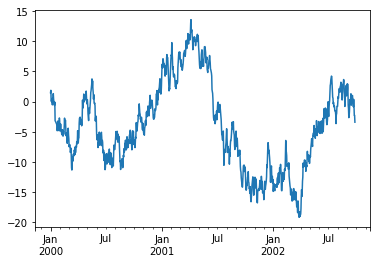

In [60]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts.cumsum().plot()

<Figure size 432x288 with 0 Axes>

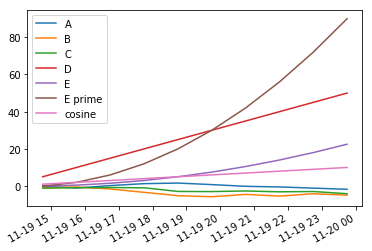

In [61]:
pdf=pd.DataFrame(np.random.randn(1000, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')